In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv(r"C:\Users\asmit\Downloads\archive\hotel_booking.csv")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

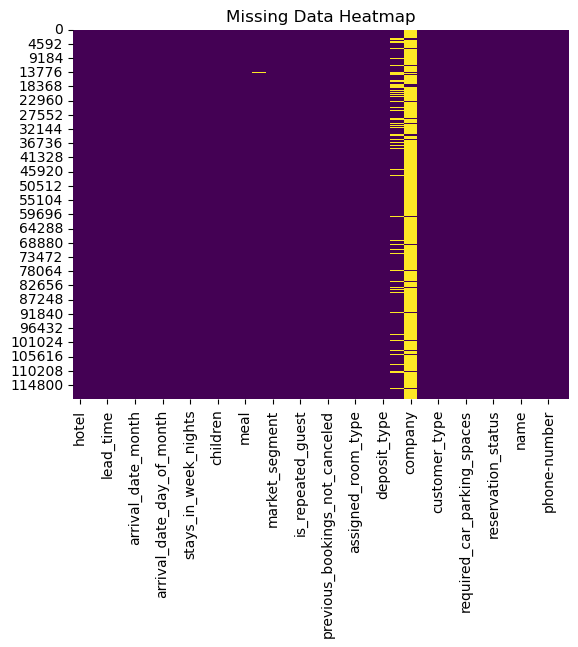

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

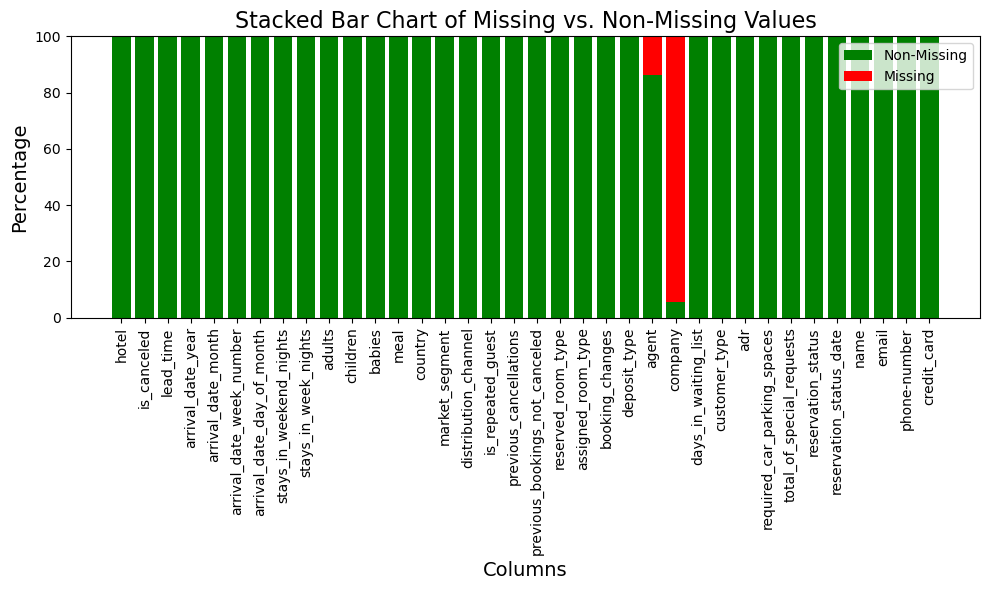

In [11]:
missing_values = df.isnull().sum() / len(df) * 100
non_missing_values = 100 - missing_values
plt.figure(figsize=(10, 6))
plt.bar(missing_values.index, non_missing_values, label='Non-Missing', color='green')
plt.bar(missing_values.index, missing_values, bottom=non_missing_values, label='Missing', color='red')
plt.xticks(rotation=90) 
plt.title('Stacked Bar Chart of Missing vs. Non-Missing Values', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [12]:
children_missing = df['children'].isnull()
print(df[children_missing].head())
print(df.groupby(children_missing)['hotel'].value_counts(normalize=True))
print(df.groupby(children_missing)['meal'].value_counts(normalize=True))

            hotel  is_canceled  lead_time  arrival_date_year  \
40600  City Hotel            1          2               2015   
40667  City Hotel            1          1               2015   
40679  City Hotel            1          1               2015   
41160  City Hotel            1          8               2015   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
40600             August                        32                          3   
40667             August                        32                          5   
40679             August                        32                          5   
41160             August                        33                         13   

       stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
40600                        1                     0       2  ...   
40667                        0                     2       2  ...   
40679                        0                     2       3  ... 

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


C:\Users\asmit\AppData\Local\Temp\ipykernel_23232\2137560719.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_by_hotel.index, y=missing_by_hotel.values, palette='viridis')


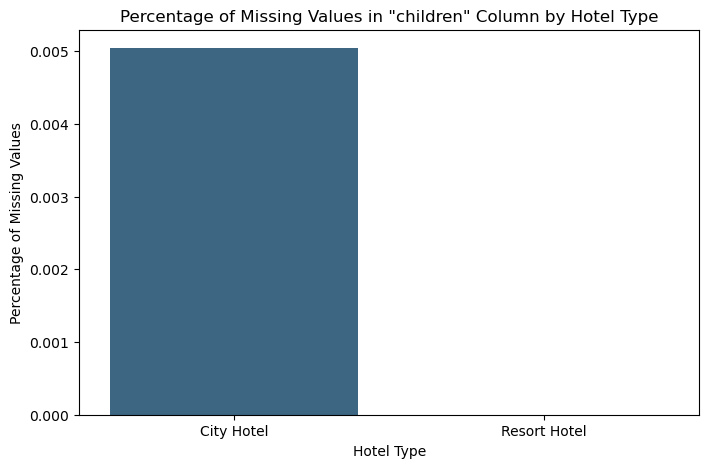

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
missing_by_hotel = df.groupby('hotel')['children'].apply(lambda x: x.isnull().mean() * 100)
plt.figure(figsize=(8, 5))
sns.barplot(x=missing_by_hotel.index, y=missing_by_hotel.values, palette='viridis')
plt.title('Percentage of Missing Values in "children" Column by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Percentage of Missing Values')
plt.show()

In [15]:
median_children = df['children'].median()

print(f"The median number of children is: {median_children}")


The median number of children is: 0.0


In [16]:
df['children'] = df.groupby('hotel')['children'].transform(lambda x: x.fillna(x.median()))

df['children_missing'] = df['children'].isnull().astype(int)

print(df[df['children'].isnull()].shape)

(0, 37)


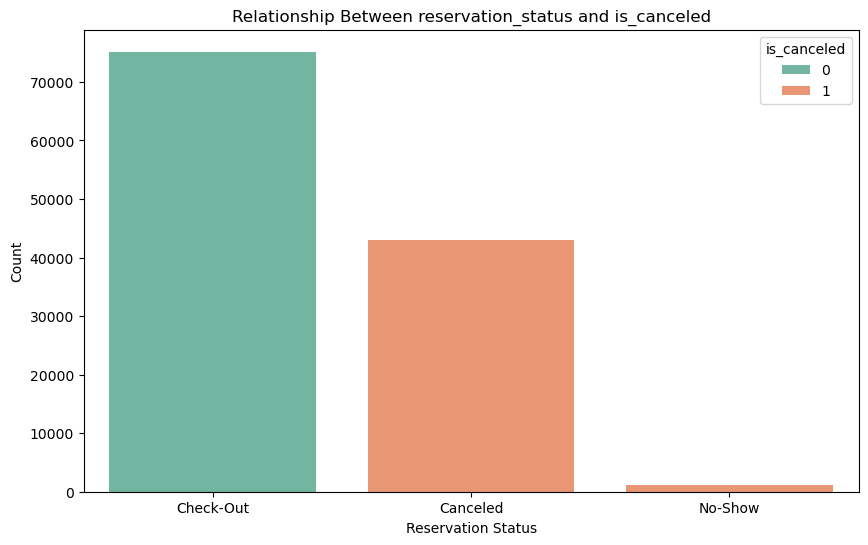

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.countplot(x='reservation_status', hue='is_canceled', data=df, palette='Set2')
plt.title('Relationship Between reservation_status and is_canceled')
plt.xlabel('Reservation Status')
plt.ylabel('Count')
plt.legend(title='is_canceled', loc='upper right')
plt.show()

In [18]:
cross_tab = pd.crosstab(df['reservation_status'], df['is_canceled'])
print(cross_tab)

is_canceled             0      1
reservation_status              
Canceled                0  43017
Check-Out           75166      0
No-Show                 0   1207


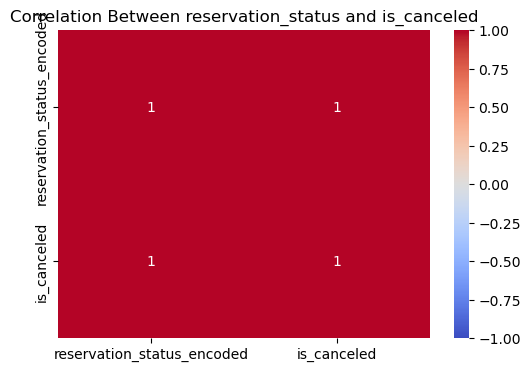

In [19]:
df['reservation_status_encoded'] = df['reservation_status'].map({'Canceled': 1, 'Check-Out': 0, 'No-Show': 1})
correlation = df[['reservation_status_encoded', 'is_canceled']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between reservation_status and is_canceled')
plt.show()

In [20]:
canceled_dates = df[df['is_canceled'] == 1]['reservation_status_date']
not_canceled_dates = df[df['is_canceled'] == 0]['reservation_status_date']
print("Canceled Bookings - Reservation Status Dates:")
print(canceled_dates.describe())
print("\nNot Canceled Bookings - Reservation Status Dates:")
print(not_canceled_dates.describe())

Canceled Bookings - Reservation Status Dates:
count          44224
unique           902
top       2015-10-21
freq            1373
Name: reservation_status_date, dtype: object

Not Canceled Bookings - Reservation Status Dates:
count          75166
unique           805
top       2015-12-08
freq             243
Name: reservation_status_date, dtype: object


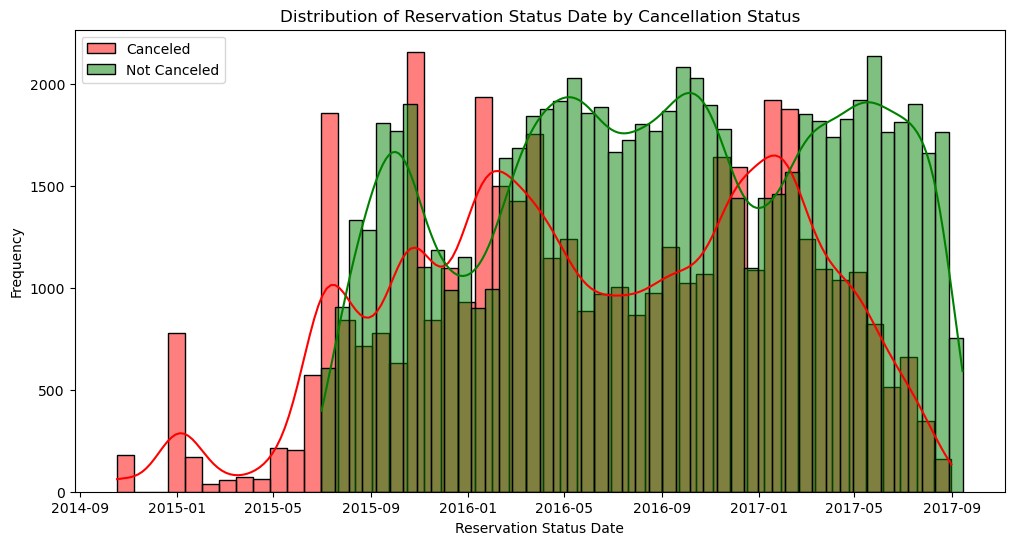

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
plt.figure(figsize=(12, 6))
sns.histplot(df[df['is_canceled'] == 1]['reservation_status_date'], color='red', label='Canceled', kde=True)
sns.histplot(df[df['is_canceled'] == 0]['reservation_status_date'], color='green', label='Not Canceled', kde=True)
plt.title('Distribution of Reservation Status Date by Cancellation Status')
plt.xlabel('Reservation Status Date')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [22]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' +
                     df['arrival_date_month'] + '-' +
                     df['arrival_date_day_of_month'].astype(str))
df['days_before_arrival'] = (df['arrival_date'] - df['reservation_status_date']).dt.days
print(df[['reservation_status_date', 'arrival_date', 'days_before_arrival', 'is_canceled']].head())

  reservation_status_date arrival_date  days_before_arrival  is_canceled
0              2015-07-01   2015-07-01                    0            0
1              2015-07-01   2015-07-01                    0            0
2              2015-07-02   2015-07-01                   -1            0
3              2015-07-02   2015-07-01                   -1            0
4              2015-07-03   2015-07-01                   -2            0


In [23]:
canceled_days = df[df['is_canceled'] == 1]['days_before_arrival']
not_canceled_days = df[df['is_canceled'] == 0]['days_before_arrival']

print("Canceled Bookings - Days Before Arrival:")
print(canceled_days.describe())

print("\nNot Canceled Bookings - Days Before Arrival:")
print(not_canceled_days.describe())

Canceled Bookings - Days Before Arrival:
count    44224.000000
mean        85.880630
std         90.694686
min          0.000000
25%         17.000000
50%         54.000000
75%        127.000000
max        526.000000
Name: days_before_arrival, dtype: float64

Not Canceled Bookings - Days Before Arrival:
count    75166.000000
mean        -3.390376
std          2.576150
min        -69.000000
25%         -4.000000
50%         -3.000000
75%         -2.000000
max          0.000000
Name: days_before_arrival, dtype: float64


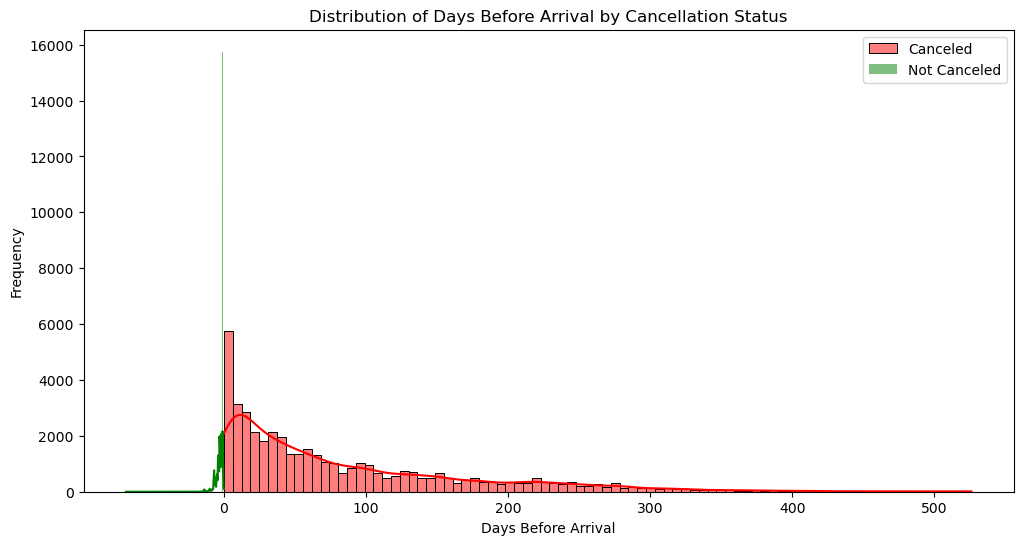

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.histplot(canceled_days, color='red', label='Canceled', kde=True)
sns.histplot(not_canceled_days, color='green', label='Not Canceled', kde=True)
plt.title('Distribution of Days Before Arrival by Cancellation Status')
plt.xlabel('Days Before Arrival')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [25]:
canceled_days_set = set(canceled_days.dropna())
not_canceled_days_set = set(not_canceled_days.dropna())

overlap = canceled_days_set.intersection(not_canceled_days_set)
print(f"Number of overlapping days: {len(overlap)}")

Number of overlapping days: 1


In [26]:
canceled_bookings = df[df['is_canceled'] == 1]

print(canceled_bookings[['reservation_status_date', 'arrival_date', 'days_before_arrival', 'is_canceled']].head())


   reservation_status_date arrival_date  days_before_arrival  is_canceled
8               2015-05-06   2015-07-01                   56            1
9               2015-04-22   2015-07-01                   70            1
10              2015-06-23   2015-07-01                    8            1
27              2015-05-11   2015-07-01                   51            1
32              2015-05-29   2015-07-01                   33            1


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 40 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119390 non-null  float64

In [28]:
df.drop(columns=['reservation_status_date','days_before_arrival','reservation_status'], inplace=True)
print(df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'name',
       'email', 'phone-number', 'credit_card', 'children_missing',
       'reservation_status_encoded', 'arrival_date'],
      dtype='object')


In [29]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['assigned_room_type'], df['is_canceled'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square p-value: {p}")

Chi-square p-value: 0.0


In [30]:
cancellation_rate = df.groupby('arrival_date_year')['is_canceled'].mean().sort_values(ascending=False)
print(cancellation_rate)

arrival_date_year
2017    0.386979
2015    0.370158
2016    0.358633
Name: is_canceled, dtype: float64


In [31]:
from scipy.stats import f_oneway
years = df['arrival_date_year'].unique()
grouped_data = [df[df['arrival_date_year'] == year]['is_canceled'] for year in years]
f_stat, p = f_oneway(*grouped_data)
print(f"ANOVA p-value: {p}")

ANOVA p-value: 1.859612999587399e-18


In [32]:
from scipy.stats import f_oneway
agents = df['agent'].dropna().unique()
grouped_data = [df[df['agent'] == agent]['is_canceled'] for agent in agents]
f_stat, p = f_oneway(*grouped_data)
print(f"ANOVA p-value: {p}")

ANOVA p-value: 0.0


In [33]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['country'], df['is_canceled'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square p-value: {p}")

Chi-square p-value: 0.0


In [34]:
cancellation_rate = df.groupby('country')['is_canceled'].mean().sort_values(ascending=False)
print(cancellation_rate.head(10))

country
KHM    1.0
BEN    1.0
GGY    1.0
GLP    1.0
HND    1.0
IMN    1.0
JEY    1.0
MYT    1.0
NIC    1.0
FJI    1.0
Name: is_canceled, dtype: float64


C:\Users\asmit\AppData\Local\Temp\ipykernel_23232\1301365154.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancellation_rate.index, y=cancellation_rate.values, palette='viridis')


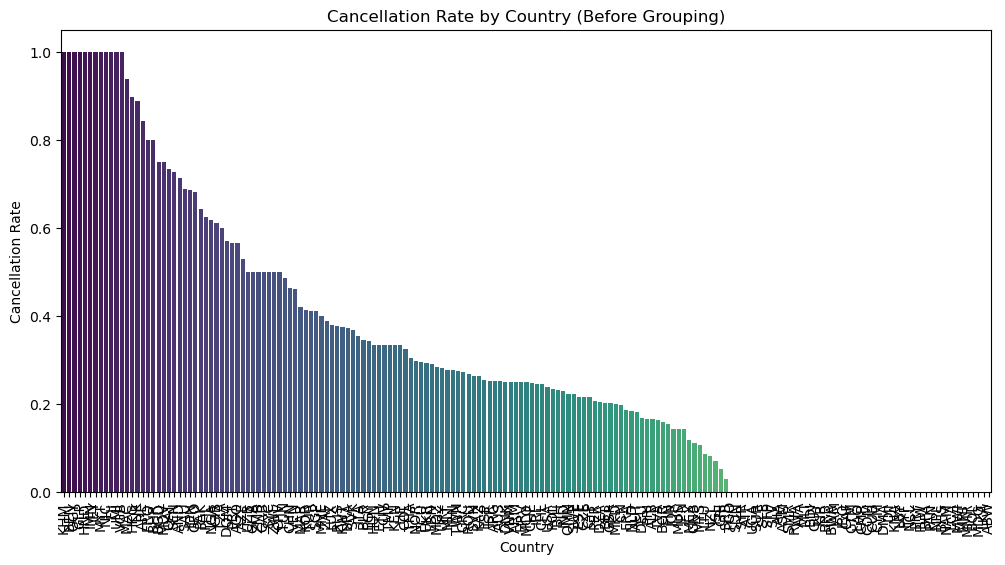

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
cancellation_rate = df.groupby('country')['is_canceled'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=cancellation_rate.index, y=cancellation_rate.values, palette='viridis')
plt.title('Cancellation Rate by Country (Before Grouping)')
plt.xlabel('Country')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=90)
plt.show()

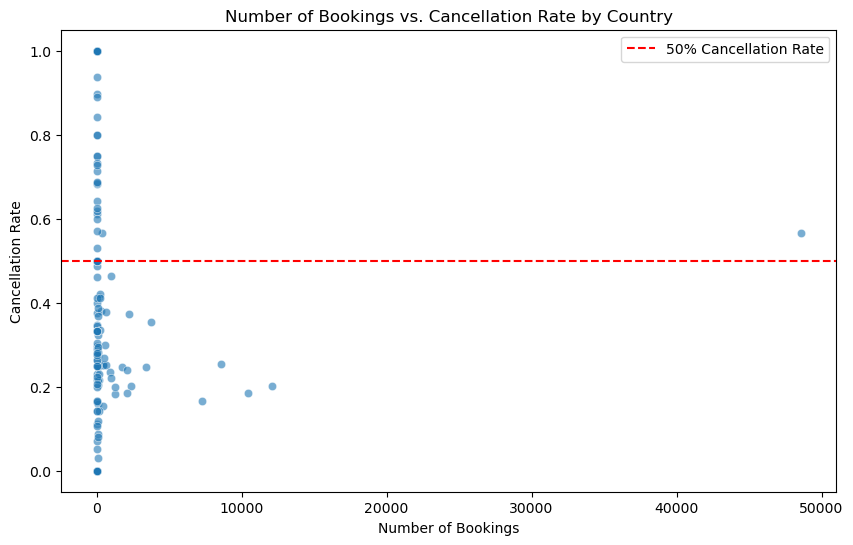

In [36]:
country_stats = df.groupby('country').agg(
    num_bookings=('is_canceled', 'size'),
    cancellation_rate=('is_canceled', 'mean')
).reset_index()
plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_bookings', y='cancellation_rate', data=country_stats, alpha=0.6)
plt.title('Number of Bookings vs. Cancellation Rate by Country')
plt.xlabel('Number of Bookings')
plt.ylabel('Cancellation Rate')
plt.axhline(y=0.5, color='red', linestyle='--', label='50% Cancellation Rate')
plt.legend()
plt.show()

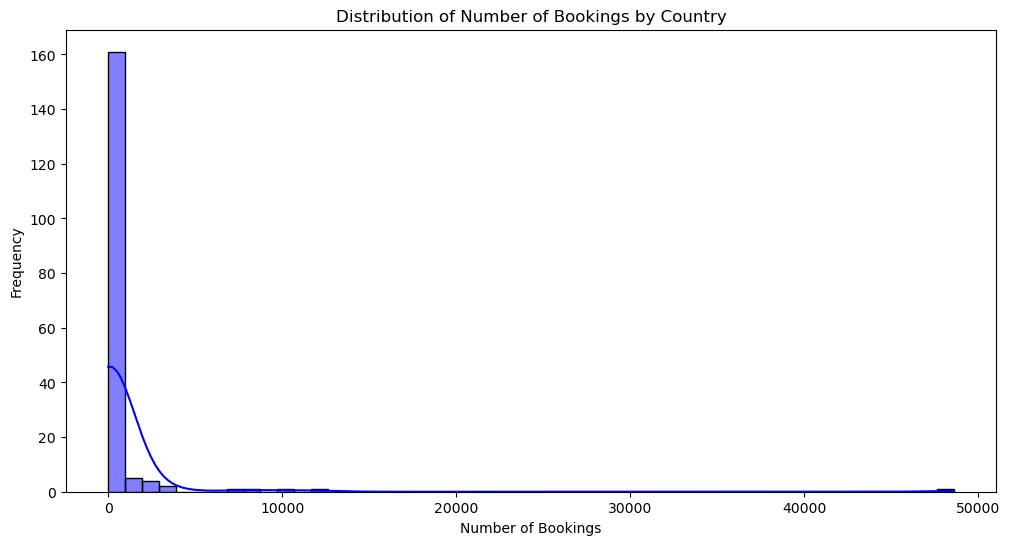

In [37]:
plt.figure(figsize=(12, 6))
sns.histplot(country_stats['num_bookings'], bins=50, kde=True, color='blue')
plt.title('Distribution of Number of Bookings by Country')
plt.xlabel('Number of Bookings')
plt.ylabel('Frequency')
plt.show()

In [38]:
df.drop(columns=['email'], inplace=True)
print(df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'name',
       'phone-number', 'credit_card', 'children_missing',
       'reservation_status_encoded', 'arrival_date'],
      dtype='object')


In [39]:
df.drop(columns=['phone-number'], inplace=True)

print(df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'name',
       'credit_card', 'children_missing', 'reservation_status_encoded',
       'arrival_date'],
      dtype='object')


In [40]:
df.drop(columns=['name'], inplace=True)
print(df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'credit_card', 'children_missing', 'reservation_status_encoded',
       'arrival_date'],
      dtype='object')


In [41]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
is_canceled,119390.0,0.370416,0.0,0.0,0.0,1.0,1.0,0.482918
lead_time,119390.0,104.011416,0.0,18.0,69.0,160.0,737.0,106.863097
arrival_date_year,119390.0,2016.156554,2015.0,2016.0,2016.0,2017.0,2017.0,0.707476
arrival_date_week_number,119390.0,27.165173,1.0,16.0,28.0,38.0,53.0,13.605138
arrival_date_day_of_month,119390.0,15.798241,1.0,8.0,16.0,23.0,31.0,8.780829
stays_in_weekend_nights,119390.0,0.927599,0.0,0.0,1.0,2.0,19.0,0.998613
stays_in_week_nights,119390.0,2.500302,0.0,1.0,2.0,3.0,50.0,1.908286
adults,119390.0,1.856403,0.0,2.0,2.0,2.0,55.0,0.579261
children,119390.0,0.103886,0.0,0.0,0.0,0.0,10.0,0.398555
babies,119390.0,0.007949,0.0,0.0,0.0,0.0,10.0,0.097436


In [42]:
a = (df[df['adr'] < 0]).count()

In [43]:
a

hotel                             1
is_canceled                       1
lead_time                         1
arrival_date_year                 1
arrival_date_month                1
arrival_date_week_number          1
arrival_date_day_of_month         1
stays_in_weekend_nights           1
stays_in_week_nights              1
adults                            1
children                          1
babies                            1
meal                              1
country                           1
market_segment                    1
distribution_channel              1
is_repeated_guest                 1
previous_cancellations            1
previous_bookings_not_canceled    1
reserved_room_type                1
assigned_room_type                1
booking_changes                   1
deposit_type                      1
agent                             1
company                           0
days_in_waiting_list              1
customer_type                     1
adr                         

In [44]:
mean_adr = df['adr'].mean()
median_adr = df['adr'].median()

# df['adr'] = df['adr'].apply(lambda x: mean_adr if x < 0 else x) 
df['adr'] = df['adr'].apply(lambda x: median_adr if x < 0 else x) 

In [45]:
a = (df[df['adr'] < 0]).count()

In [46]:
a

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [47]:
print(df[['children', 'babies']].max())
pd.set_option('display.max_columns', None)
df[df['children'] == 10]
df[df['babies'] == 10]

children    10.0
babies      10.0
dtype: float64


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,credit_card,children_missing,reservation_status_encoded,arrival_date
46619,City Hotel,0,37,2016,January,3,12,0,2,2,0.0,10,BB,PRT,Online TA,TA/TO,0,0,0,D,D,1,No Deposit,9.0,NaN,0,Transient,84.45,0,1,************4291,0,0,2016-01-12


In [48]:
high_children = df[df['children'] == 10]
high_babies = df[df['babies'] == 10]
print(f"Rows with 10 children: {len(high_children)}")
print(f"Rows with 10 babies: {len(high_babies)}")

Rows with 10 children: 1
Rows with 10 babies: 1


In [49]:
df = df[(df['children'] != 10) & (df['babies'] != 10)]

In [50]:
zero_adults = df[df['adults'] == 0]
print(f"Rows with 0 adults: {len(zero_adults)}")

Rows with 0 adults: 403


In [51]:
df = df[df['adults'] > 0]

In [52]:
print(df[df['adults'] == 0])

Empty DataFrame
Columns: [hotel, is_canceled, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, company, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, credit_card, children_missing, reservation_status_encoded, arrival_date]
Index: []


In [53]:
print(df['adults'].describe())

count    118985.000000
mean          1.862689
std           0.570064
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          55.000000
Name: adults, dtype: float64


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118985 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118985 non-null  object        
 1   is_canceled                     118985 non-null  int64         
 2   lead_time                       118985 non-null  int64         
 3   arrival_date_year               118985 non-null  int64         
 4   arrival_date_month              118985 non-null  object        
 5   arrival_date_week_number        118985 non-null  int64         
 6   arrival_date_day_of_month       118985 non-null  int64         
 7   stays_in_weekend_nights         118985 non-null  int64         
 8   stays_in_week_nights            118985 non-null  int64         
 9   adults                          118985 non-null  int64         
 10  children                        118985 non-null  float64     

In [55]:
df.drop(columns=['reservation_status_encoded'], inplace=True)
print(df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'credit_card', 'children_missing', 'arrival_date'],
      dtype='object')


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118985 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118985 non-null  object        
 1   is_canceled                     118985 non-null  int64         
 2   lead_time                       118985 non-null  int64         
 3   arrival_date_year               118985 non-null  int64         
 4   arrival_date_month              118985 non-null  object        
 5   arrival_date_week_number        118985 non-null  int64         
 6   arrival_date_day_of_month       118985 non-null  int64         
 7   stays_in_weekend_nights         118985 non-null  int64         
 8   stays_in_week_nights            118985 non-null  int64         
 9   adults                          118985 non-null  int64         
 10  children                        118985 non-null  float64     

Percentage of missing values in 'company': 94.31%


C:\Users\asmit\AppData\Local\Temp\ipykernel_23232\3714451461.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')


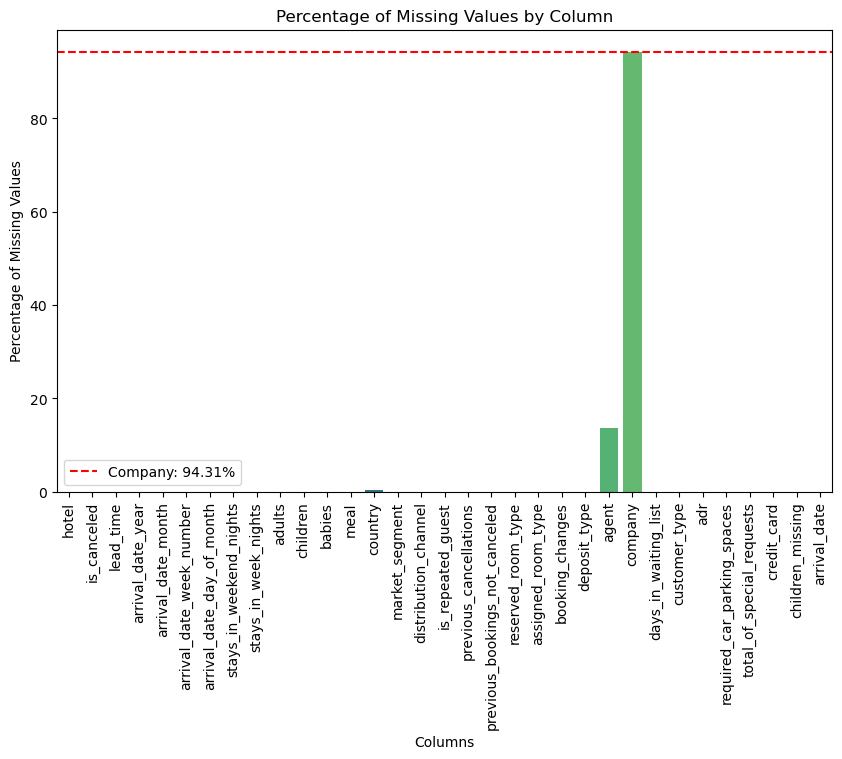

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
missing_percentage = (df['company'].isnull().sum() / len(df)) * 100
print(f"Percentage of missing values in 'company': {missing_percentage:.2f}%")
missing_values = df.isnull().sum() / len(df) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=90)
plt.axhline(y=missing_percentage, color='red', linestyle='--', label=f'Company: {missing_percentage:.2f}%')
plt.legend()
plt.show()

In [58]:
df.drop(columns=['company'], inplace=True)

print(df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'credit_card', 'children_missing', 'arrival_date'],
      dtype='object')


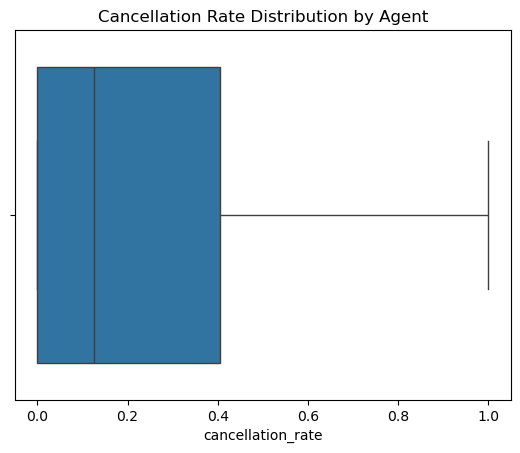

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

agent_cancellation = df.groupby('agent')['is_canceled'].mean().reset_index()
agent_cancellation.columns = ['agent', 'cancellation_rate']

sns.boxplot(x=agent_cancellation['cancellation_rate'])
plt.title('Cancellation Rate Distribution by Agent')
plt.show()

In [60]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['agent'], df['is_canceled'])

chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-Square Statistic: {chi2}, p-value: {p}')

Chi-Square Statistic: 16193.416600081106, p-value: 0.0


In [61]:
correlation = df['agent'].corr(df['is_canceled'], method='spearman')
print(f'Correlation between agent and cancellation: {correlation}')

Correlation between agent and cancellation: -0.11527166337534214


In [62]:
df.drop(columns=['agent'], inplace=True)

print(df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'credit_card', 'children_missing', 'arrival_date'],
      dtype='object')


In [63]:
df.drop(columns=['credit_card'], inplace=True)

print(df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'children_missing', 'arrival_date'],
      dtype='object')


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118985 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118985 non-null  object        
 1   is_canceled                     118985 non-null  int64         
 2   lead_time                       118985 non-null  int64         
 3   arrival_date_year               118985 non-null  int64         
 4   arrival_date_month              118985 non-null  object        
 5   arrival_date_week_number        118985 non-null  int64         
 6   arrival_date_day_of_month       118985 non-null  int64         
 7   stays_in_weekend_nights         118985 non-null  int64         
 8   stays_in_week_nights            118985 non-null  int64         
 9   adults                          118985 non-null  int64         
 10  children                        118985 non-null  float64     

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118985 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118985 non-null  object        
 1   is_canceled                     118985 non-null  int64         
 2   lead_time                       118985 non-null  int64         
 3   arrival_date_year               118985 non-null  int64         
 4   arrival_date_month              118985 non-null  object        
 5   arrival_date_week_number        118985 non-null  int64         
 6   arrival_date_day_of_month       118985 non-null  int64         
 7   stays_in_weekend_nights         118985 non-null  int64         
 8   stays_in_week_nights            118985 non-null  int64         
 9   adults                          118985 non-null  int64         
 10  children                        118985 non-null  float64     

In [66]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

print(categorical_columns)

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type'],
      dtype='object')


In [67]:
non_categorical_columns = df.select_dtypes(include=['int64', 'float64', 'datetime64[ns]']).columns

print(non_categorical_columns)

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'arrival_date'],
      dtype='object')


C:\Users\asmit\AppData\Local\Temp\ipykernel_23232\2662277640.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='arrival_date_year', y='is_canceled', data=cancellation_by_year, palette='viridis')


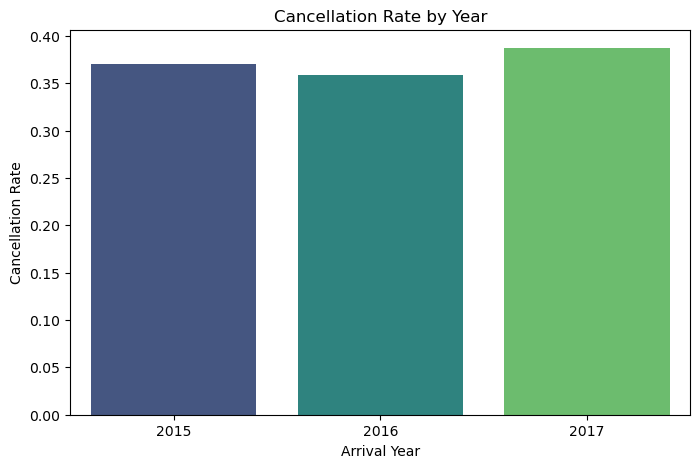

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
cancellation_by_year = df.groupby('arrival_date_year')['is_canceled'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='arrival_date_year', y='is_canceled', data=cancellation_by_year, palette='viridis')
plt.title('Cancellation Rate by Year')
plt.xlabel('Arrival Year')
plt.ylabel('Cancellation Rate')
plt.show()

In [69]:
df.drop(columns=['arrival_date_year'], inplace=True)

print(df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'children_missing', 'arrival_date'],
      dtype='object')


In [70]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

print(categorical_columns)

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type'],
      dtype='object')


In [71]:
non_categorical_columns = df.select_dtypes(include=['int64', 'float64', 'datetime64[ns]']).columns

print(non_categorical_columns)

Index(['is_canceled', 'lead_time', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'arrival_date'],
      dtype='object')


C:\Users\asmit\AppData\Local\Temp\ipykernel_23232\1003118439.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='is_canceled', data=df, palette='viridis')


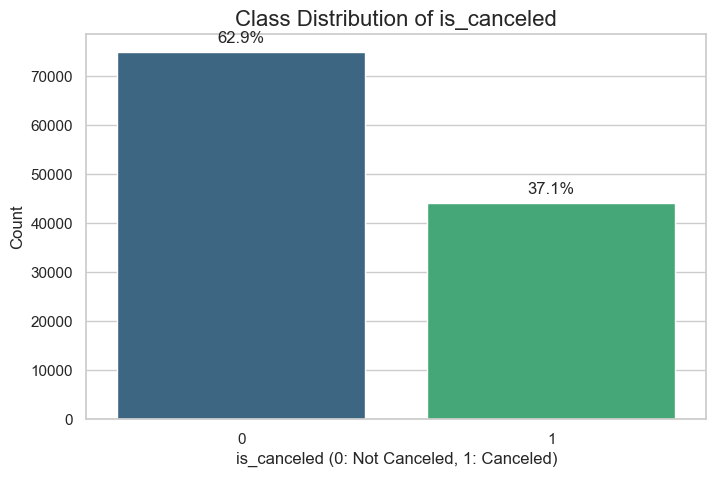

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

class_percentage = df['is_canceled'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='is_canceled', data=df, palette='viridis')

plt.title('Class Distribution of is_canceled', fontsize=16)
plt.xlabel('is_canceled (0: Not Canceled, 1: Canceled)', fontsize=12)
plt.ylabel('Count', fontsize=12)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / len(df) * 100:.1f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.show()

In [73]:
for col in df.select_dtypes(include=['object', 'category']).columns:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} unique values")

hotel: 2 unique values
arrival_date_month: 12 unique values
meal: 5 unique values
country: 177 unique values
market_segment: 8 unique values
distribution_channel: 5 unique values
reserved_room_type: 9 unique values
assigned_room_type: 11 unique values
deposit_type: 3 unique values
customer_type: 4 unique values


C:\Users\asmit\AppData\Local\Temp\ipykernel_23232\1989951894.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_counts.index, y=unique_counts.values, palette='viridis')


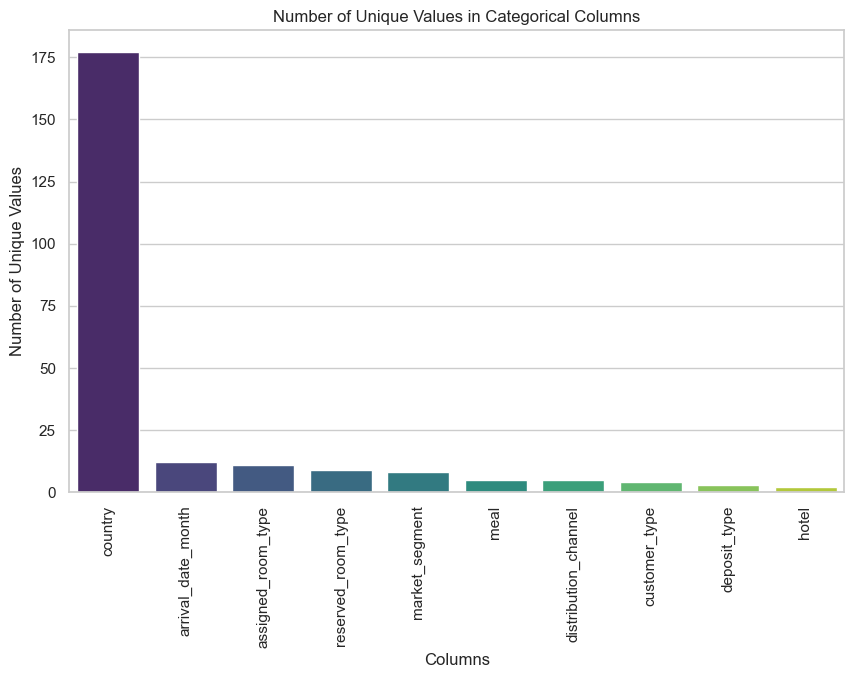

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

unique_counts = df.select_dtypes(include=['object', 'category']).nunique().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=unique_counts.index, y=unique_counts.values, palette='viridis')
plt.title('Number of Unique Values in Categorical Columns')
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
plt.xticks(rotation=90)
plt.show()

In [75]:
df.drop(columns=['country'], inplace=True)

print(df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'children_missing', 'arrival_date'],
      dtype='object')


In [76]:
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

In [77]:
X[X['market_segment']=='Undefined']

,hotel,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,children_missing,arrival_date
40600,City Hotel,2,August,32,3,1,0,2,0.0,0,BB,Undefined,Undefined,0,0,0,B,B,0,No Deposit,0,Transient-Party,12.0,0,1,0,2015-08-03
40679,City Hotel,1,August,32,5,0,2,3,0.0,0,BB,Undefined,Undefined,0,0,0,B,B,0,No Deposit,0,Transient-Party,18.0,0,2,0,2015-08-05


In [78]:
y

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 118985, dtype: int64

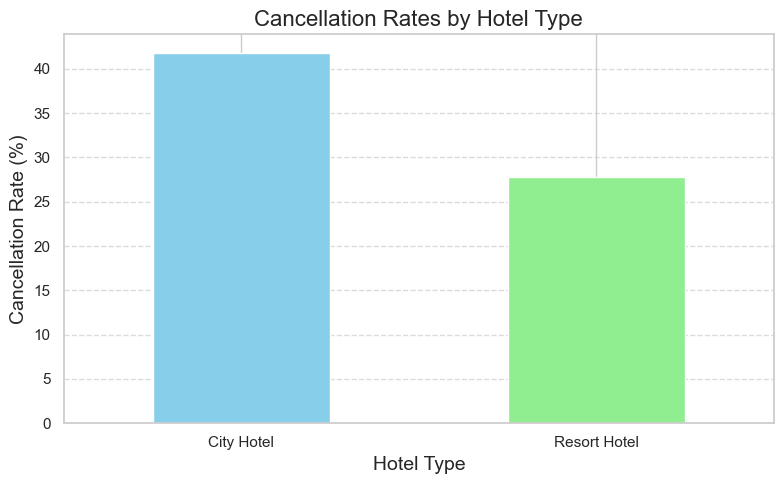

In [80]:
cancellation_rates = df.groupby('hotel')['is_canceled'].mean() * 100
plt.figure(figsize=(8, 5))
cancellation_rates.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Cancellation Rates by Hotel Type', fontsize=16)
plt.xlabel('Hotel Type', fontsize=14)
plt.ylabel('Cancellation Rate (%)', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

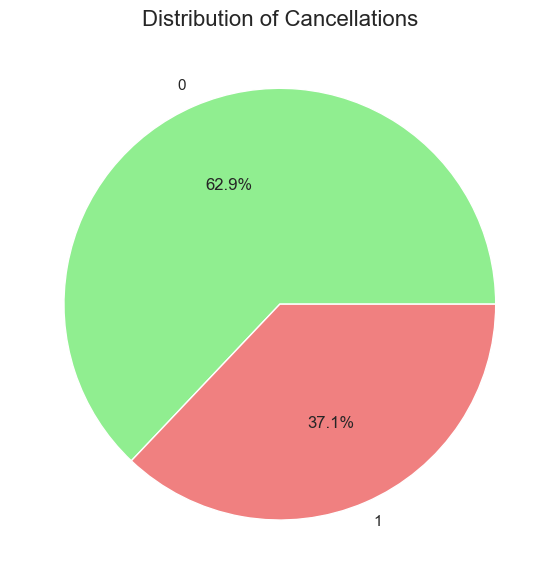

In [81]:
plt.figure(figsize=(6, 6))
df['is_canceled'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Distribution of Cancellations', fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.show()

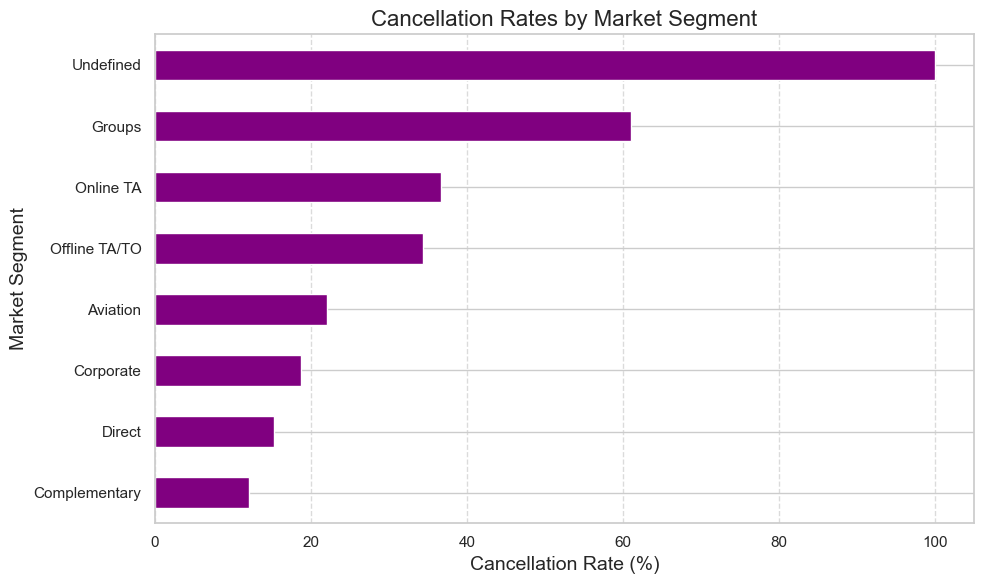

In [82]:
cancellation_by_market_segment = df.groupby('market_segment')['is_canceled'].mean() * 100
plt.figure(figsize=(10, 6))
cancellation_by_market_segment.sort_values().plot(kind='barh', color='purple')
plt.title('Cancellation Rates by Market Segment', fontsize=16)
plt.xlabel('Cancellation Rate (%)', fontsize=14)
plt.ylabel('Market Segment', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

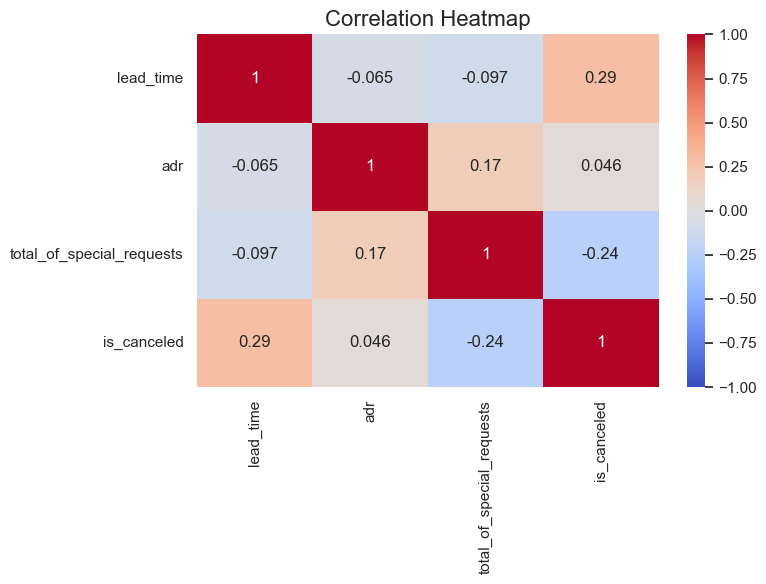

In [83]:
numerical_features = ['lead_time', 'adr', 'total_of_special_requests', 'is_canceled']

correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

C:\Users\asmit\AppData\Local\Temp\ipykernel_23232\1776514261.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancellation_by_lead_time = df.groupby('lead_time_bins')['is_canceled'].mean() * 100


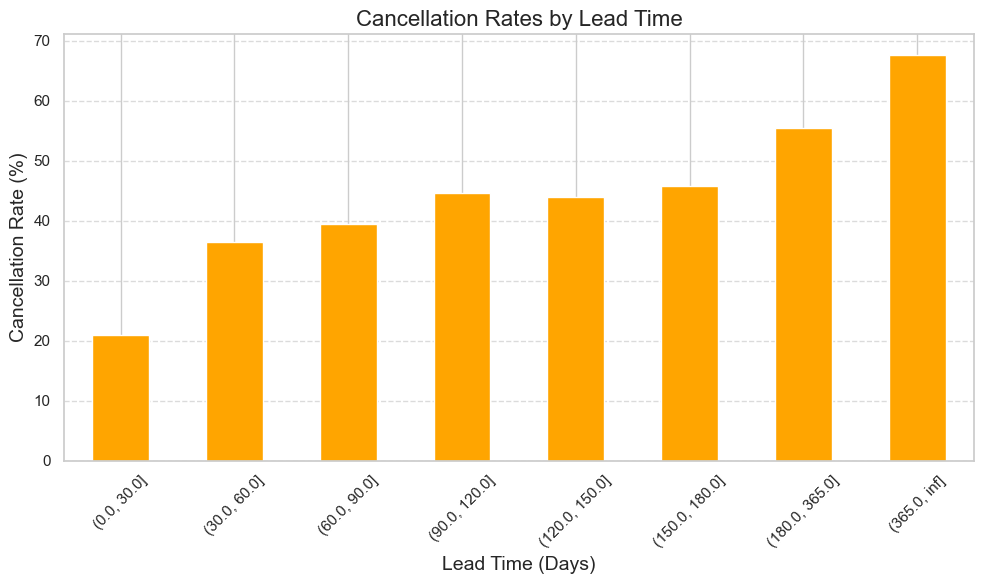

In [84]:
df['lead_time_bins'] = pd.cut(df['lead_time'], bins=[0, 30, 60, 90, 120, 150, 180, 365, float('inf')])

cancellation_by_lead_time = df.groupby('lead_time_bins')['is_canceled'].mean() * 100

plt.figure(figsize=(10, 6))
cancellation_by_lead_time.plot(kind='bar', color='orange')
plt.title('Cancellation Rates by Lead Time', fontsize=16)
plt.xlabel('Lead Time (Days)', fontsize=14)
plt.ylabel('Cancellation Rate (%)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

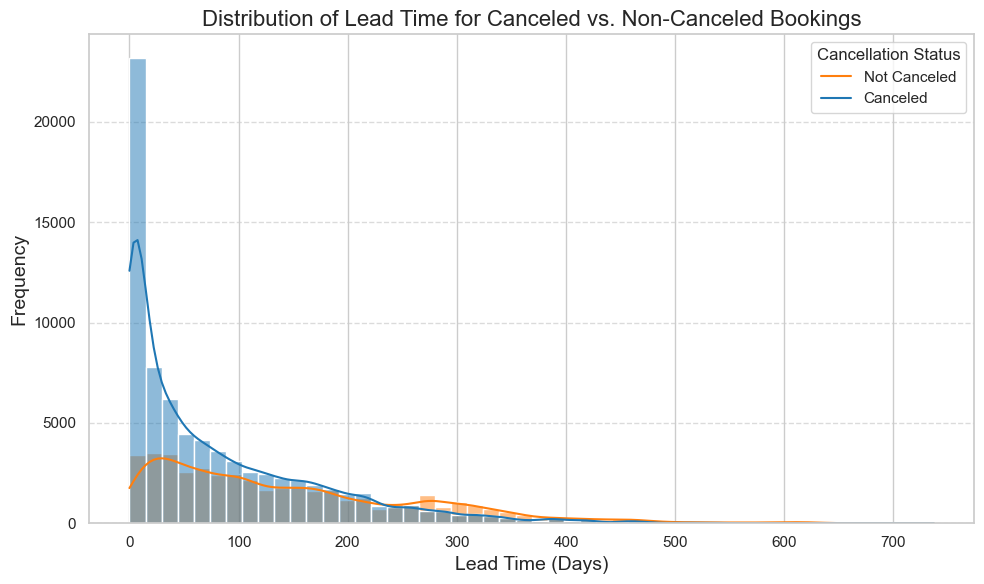

In [85]:
colors = ["#1f77b4", "#ff7f0e"] 
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='lead_time', hue='is_canceled', bins=50, kde=True, palette=colors)
plt.title('Distribution of Lead Time for Canceled vs. Non-Canceled Bookings', fontsize=16)
plt.xlabel('Lead Time (Days)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Cancellation Status', labels=['Not Canceled', 'Canceled'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\asmit\AppData\Local\Temp\ipykernel_23232\1550883204.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='hotel', y='adr', hue='is_canceled', palette=colors, ci=None)


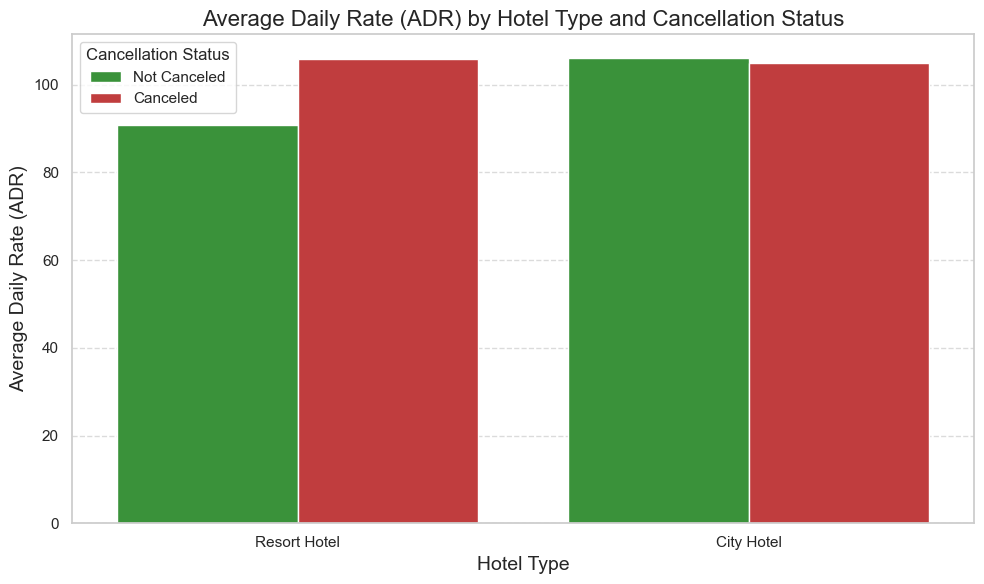

In [86]:
colors = ["#2ca02c", "#d62728"] 
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='hotel', y='adr', hue='is_canceled', palette=colors, ci=None)
plt.title('Average Daily Rate (ADR) by Hotel Type and Cancellation Status', fontsize=16)
plt.xlabel('Hotel Type', fontsize=14)
plt.ylabel('Average Daily Rate (ADR)', fontsize=14)
plt.legend(title='Cancellation Status', labels=['Not Canceled', 'Canceled'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

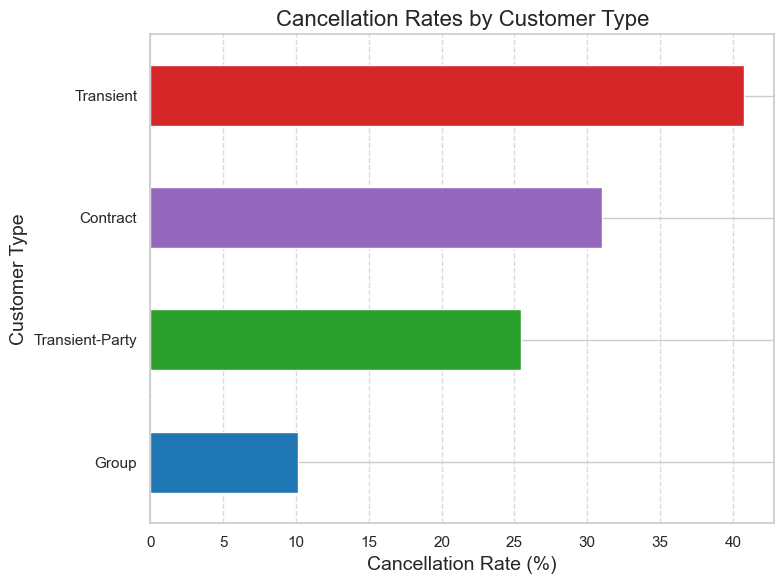

In [87]:
colors = ["#1f77b4", "#2ca02c", "#9467bd","#d62728"]

cancellation_by_customer_type = df.groupby('customer_type')['is_canceled'].mean() * 100

plt.figure(figsize=(8, 6))
cancellation_by_customer_type.sort_values().plot(kind='barh', color=colors)
plt.title('Cancellation Rates by Customer Type', fontsize=16)
plt.xlabel('Cancellation Rate (%)', fontsize=14)
plt.ylabel('Customer Type', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

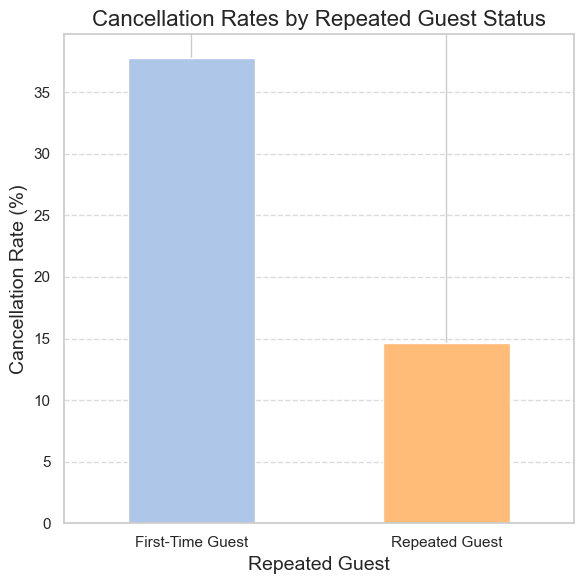

In [88]:
colors = ["#aec7e8", "#ffbb78"]

cancellation_by_repeated_guest = df.groupby('is_repeated_guest')['is_canceled'].mean() * 100

plt.figure(figsize=(6, 6))
cancellation_by_repeated_guest.plot(kind='bar', color=colors)
plt.title('Cancellation Rates by Repeated Guest Status', fontsize=16)
plt.xlabel('Repeated Guest', fontsize=14)
plt.ylabel('Cancellation Rate (%)', fontsize=14)
plt.xticks([0, 1], ['First-Time Guest', 'Repeated Guest'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

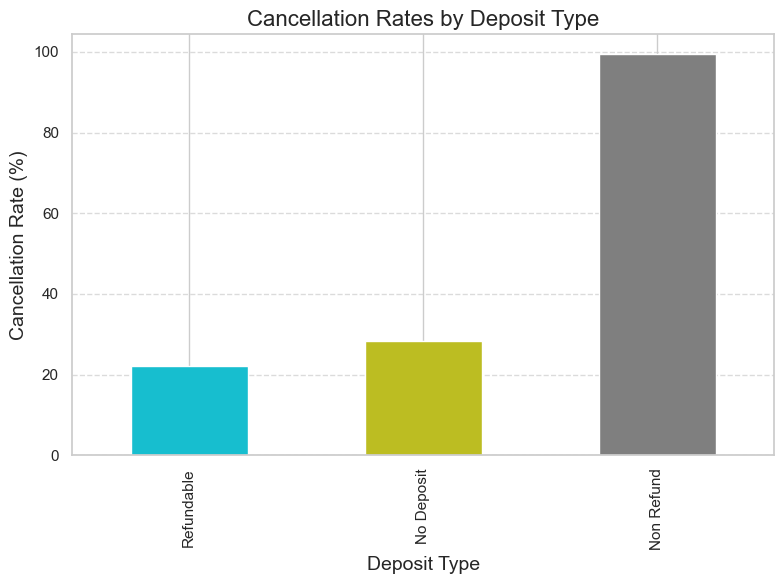

In [89]:
colors = ["#17becf", "#bcbd22", "#7f7f7f"]

cancellation_by_deposit_type = df.groupby('deposit_type')['is_canceled'].mean() * 100

plt.figure(figsize=(8, 6))
cancellation_by_deposit_type.sort_values().plot(kind='bar', color=colors)
plt.title('Cancellation Rates by Deposit Type', fontsize=16)
plt.xlabel('Deposit Type', fontsize=14)
plt.ylabel('Cancellation Rate (%)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [90]:
from sklearn.preprocessing import LabelEncoder
nominal_columns = ['hotel', 'meal', 'market_segment', 'distribution_channel',
                   'reserved_room_type', 'assigned_room_type', 'deposit_type',
                   'customer_type']
df = pd.get_dummies(df, columns=nominal_columns, drop_first=True)

label_encoder = LabelEncoder()
df['arrival_date_month'] = label_encoder.fit_transform(df['arrival_date_month'])

print(df.head())

   is_canceled  lead_time  arrival_date_month  arrival_date_week_number  \
0            0        342                   5                        27   
1            0        737                   5                        27   
2            0          7                   5                        27   
3            0         13                   5                        27   
4            0         14                   5                        27   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                          1                        0                     0   
1                          1                        0                     0   
2                          1                        0                     1   
3                          1                        0                     1   
4                          1                        0                     2   

   adults  children  babies  is_repeated_guest  previous_cancellations  \


In [91]:
df.drop(columns=['lead_time_bins','arrival_date'], inplace=True)
print(df.columns)

Index(['is_canceled', 'lead_time', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'children_missing', 'hotel_Resort Hotel',
       'meal_FB', 'meal_HB', 'meal_SC', 'meal_Undefined',
       'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'market_segment_Undefined', 'distribution_channel_Direct',
       'distribution_channel_GDS', 'distribution_channel_TA/TO',
       'distribution_channel_Undefined', 'reserved_room_type_B',
       'reserved_room_type_C', 'reserved_room_type_D', 'reserved_room_type_E',
    

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118985 entries, 0 to 119389
Data columns (total 58 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     118985 non-null  int64  
 1   lead_time                       118985 non-null  int64  
 2   arrival_date_month              118985 non-null  int32  
 3   arrival_date_week_number        118985 non-null  int64  
 4   arrival_date_day_of_month       118985 non-null  int64  
 5   stays_in_weekend_nights         118985 non-null  int64  
 6   stays_in_week_nights            118985 non-null  int64  
 7   adults                          118985 non-null  int64  
 8   children                        118985 non-null  float64
 9   babies                          118985 non-null  int64  
 10  is_repeated_guest               118985 non-null  int64  
 11  previous_cancellations          118985 non-null  int64  
 12  previous_bookings_not

In [96]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

In [142]:

# X = df.drop('is_canceled', axis=1)
# y = df['is_canceled']
# from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    stratify=y, 
    random_state=42
)

In [110]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     14974
           1       0.86      0.77      0.81      8823

    accuracy                           0.87     23797
   macro avg       0.87      0.85      0.85     23797
weighted avg       0.87      0.87      0.87     23797

ROC-AUC Score: 0.8463501570389848
Confusion Matrix:
[[13889  1085]
 [ 2072  6751]]


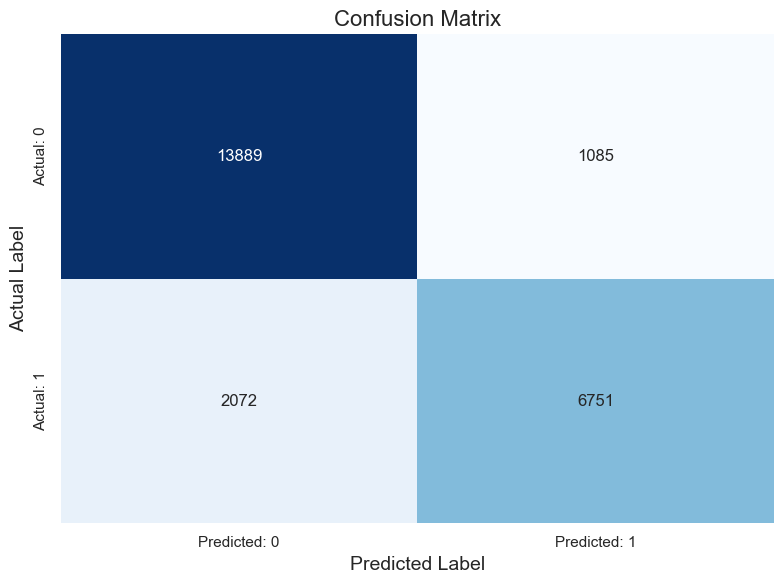

In [111]:
y_pred = rf_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted: 0', 'Predicted: 1'],
            yticklabels=['Actual: 0', 'Actual: 1'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('Actual Label', fontsize=14)
plt.tight_layout()
plt.show()

In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(random_state=42, max_iter=1000)

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.94      0.86     14917
           1       0.86      0.59      0.70      8880

    accuracy                           0.81     23797
   macro avg       0.83      0.77      0.78     23797
weighted avg       0.82      0.81      0.80     23797

ROC-AUC Score: 0.7672041678670023
Confusion Matrix:
[[14036   881]
 [ 3610  5270]]


C:\Users\asmit\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
